# Project Sales Analysis

In this notebook, we will use KMeans clustering to segment the customers.

In [175]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from sklearn.metrics import silhouette_score

%matplotlib inline

In [85]:
#Read the CSV from Part IV
rfm = pd.read_csv('./datasets/rfm_combined.csv', index_col=[0])
rfm.head()

,recency,frequency,monetary
12346,347,12,77556.46
12347,24,8,5633.32
12348,97,5,2019.40
12349,40,4,4428.69
12350,332,1,334.40


### Normalisation/Scaling

In [87]:
#Create variable
X = rfm_ss.loc[:, ['recency', 'frequency', 'monetary']]
X

,recency,frequency,monetary
0,0.592985,0.438893,5.058050
1,-0.949988,0.131434,0.177431
2,-0.601266,-0.099160,-0.067806
3,-0.873556,-0.176025,0.095686
4,0.521330,-0.406619,-0.182148
...,...,...,...
5873,-0.945211,1.207540,-0.019134
5874,1.099348,-0.406619,-0.173511
5875,2.193282,-0.406619,-0.175864
5876,1.314313,-0.329755,-0.116866


In [88]:
#Scale values with StandardScaler
ss = StandardScaler()
rfm_ss = ss.fit_transform(X)

In [89]:
X_ss = pd.DataFrame(X, columns=['recency', 'frequency', 'monetary'])
X_ss.head()

,recency,frequency,monetary
0,0.592985,0.438893,5.058050
1,-0.949988,0.131434,0.177431
2,-0.601266,-0.099160,-0.067806
3,-0.873556,-0.176025,0.095686
4,0.521330,-0.406619,-0.182148


### Plotting RFM

Text(0.5, 0, 'Monetary')

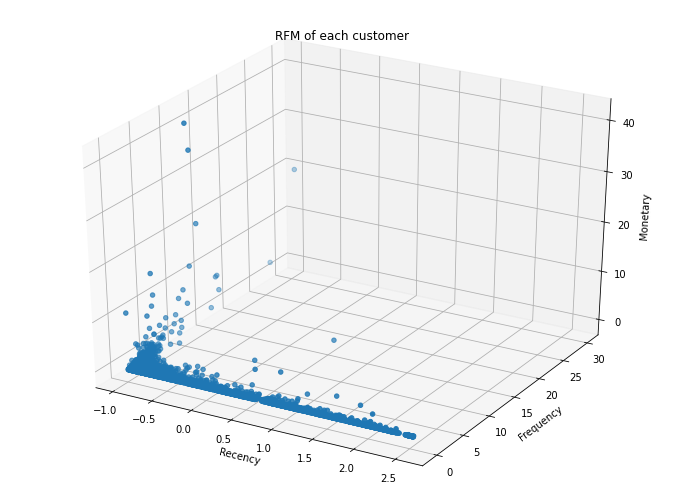

In [90]:
#Plot a 3D scatter plot using the scaled values
plt.figure(figsize = (12, 9))
ax = plt.axes(projection="3d")
ax.scatter3D(X_ss['recency'], X_ss['frequency'], X_ss['monetary'])
plt.title("RFM of each customer")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

## Modelling

### KMeans clustering
We will first start with 10 clusters like Part IV's RFM segments.

In [91]:
#Train a KMeans model to predict the labels for the dataset
km = KMeans(n_clusters=10, random_state=42)

#fit into the model
km.fit(X_ss)

KMeans(n_clusters=10, random_state=42)

In [92]:
#predict labels
X_ss['label'] = km.labels_
X_ss.head()

,recency,frequency,monetary,label
0,0.592985,0.438893,5.058050,8
1,-0.949988,0.131434,0.177431,5
2,-0.601266,-0.099160,-0.067806,5
3,-0.873556,-0.176025,0.095686,5
4,0.521330,-0.406619,-0.182148,0


In [93]:
#get cluster centers/centroids in dataframe
km_centroids = pd.DataFrame(km.cluster_centers_, columns=['recency', 'frequency', 'monetary'])

In [94]:
km_centroids.head()

,recency,frequency,monetary
0,0.085303,-0.236970,-0.133852
1,-0.805995,10.310521,5.110888
2,-0.957153,10.892497,38.387293
3,-0.802843,0.774517,0.269500
4,2.013152,-0.365819,-0.162875


### Plotting scaled values (for 10 clusters)

Text(0.5, 0, 'Monetary')

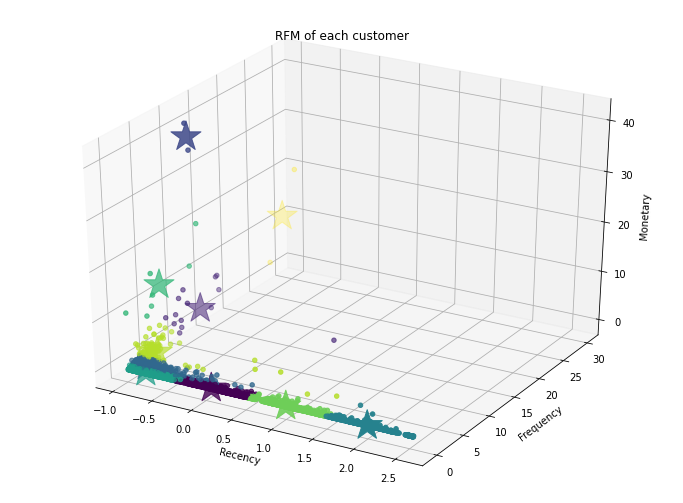

In [95]:
#Plot 3D scatter plot with the labels and the cluster centers
plt.figure(figsize = (12, 9))
ax = plt.axes(projection="3d")
ax.scatter3D(X_ss['recency'], X_ss['frequency'], X_ss['monetary'], c=X_ss['label'], s=20)
ax.scatter3D(km_centroids['recency'], km_centroids['frequency'], km_centroids['monetary'], 
             c=[x for x in range(0,10)],
             marker="*", s=1000)

plt.title("RFM of each customer")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

## Optimizing the number of clusters

We will be using both inertia and silhouette scores to evaluate the viability of the clusters, and optimise the number of clusters for the model. 

**Inertia** is sum of squared distance to the centroid for each cluster.

**Silhouette Score** is the average of the silhouette of each point within a cluster in relation to other clusters. The logic behind the silhouette score is that cohesion should be low, while separation should be high.


In [99]:
#Create a list of inertia/sum of squared errors based on different number of clusters, between 1 to 14
scores = []

for i in range(2, 15):
    #initialise KMeans
    kms = KMeans(n_clusters=i, random_state=42)

    #fit into the model
    kms.fit(X_ss.loc[:, ['recency', 'frequency', 'monetary']])
    
    #calculate inertia
    inertia = kms.inertia_
    
    #calculate silhouette score
    silhouette = silhouette_score(X_ss.loc[:, ['recency', 'frequency', 'monetary']], kms.labels_)
    
    #append scores
    scores.append([i, inertia, silhouette])

In [104]:
scores_of_clusters = pd.DataFrame(scores, columns = ['no_of_clusters', 'inertia', 'silhouette_score'])
scores_of_clusters

,no_of_clusters,inertia,silhouette_score
0,2,12113.782255,0.923562
1,3,7123.220700,0.580282
2,4,5166.057844,0.590524
3,5,3909.344020,0.600433
4,6,3317.116998,0.546008
5,7,2737.259372,0.548418
6,8,2253.674327,0.539468
7,9,1910.056269,0.540860
8,10,1667.003967,0.503433
9,11,1467.384123,0.499207


Text(0.5, 1.0, 'Silhouette score over number of clusters')

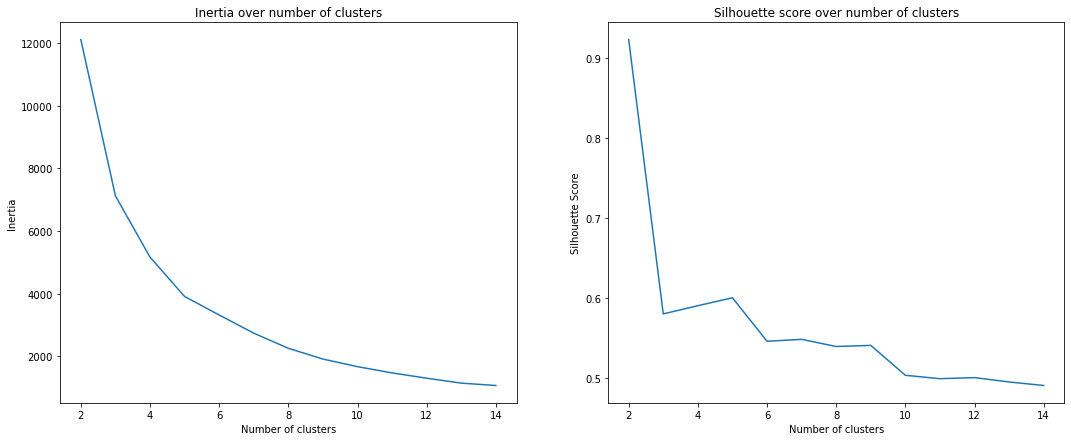

In [123]:
fig, axes = plt.subplots(1,2, figsize=(18,7))
#Plot inertia over no. of clusters (inertia Elbow Point Graph)
axes[0].plot(scores_of_clusters['no_of_clusters'], scores_of_clusters['inertia'])
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Inertia over number of clusters')

#Plot silhouette score over no. of clusters
axes[1].plot(scores_of_clusters['no_of_clusters'], scores_of_clusters['silhouette_score'])
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette score over number of clusters')

### KMeans optimized number of clusters
We will be utilising 5 as the number of optimised clusters for the model.

In [140]:
X_5 = X_ss.loc[:, ['recency', 'frequency', 'monetary']]

In [141]:
#Perform the clustering step with the new number of clusters
km = KMeans(n_clusters=5, random_state=42)

km.fit(X_5)

KMeans(n_clusters=5, random_state=42)

In [144]:
X_5['label'] = km.labels_
X_5.head()

,recency,frequency,monetary,label
0,0.592985,0.438893,5.058050,3
1,-0.949988,0.131434,0.177431,1
2,-0.601266,-0.099160,-0.067806,1
3,-0.873556,-0.176025,0.095686,1
4,0.521330,-0.406619,-0.182148,0


In [147]:
#calculate centroids
centroid_5 = pd.DataFrame(km.cluster_centers_, columns=['recency', 'frequency', 'monetary'])
centroid_5

,recency,frequency,monetary
0,1.291414,-0.316897,-0.153576
1,-0.599089,-0.090466,-0.075165
2,-0.855244,8.727474,6.643951
3,-0.827681,1.709870,0.740784
4,-0.946405,15.850273,29.438323


Text(0.5, 0, 'Monetary')

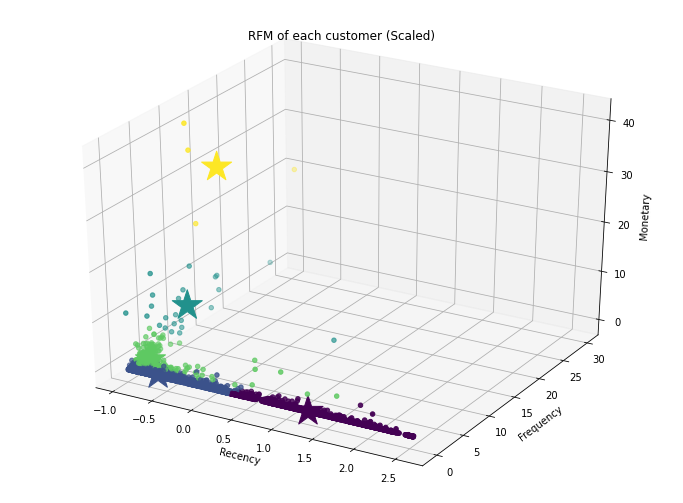

In [149]:
#Plot the values with the labels, and the cluster centers (scaled values and centers)
plt.figure(figsize = (12, 9))
ax = plt.axes(projection="3d")
ax.scatter3D(X_5['recency'], X_5['frequency'], X_5['monetary'], c=X_5['label'], s=20)
ax.scatter3D(centroid_5['recency'], centroid_5['frequency'], centroid_5['monetary'], 
             c=[x for x in range(0,5)],
             marker="*", s=1000, depthshade=False)

plt.title("RFM of each customer (Scaled)")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

### Non-scaled RFM

In [142]:
rfm['label'] = km.labels_
rfm.head()

,recency,frequency,monetary,label
12346,347,12,77556.46,3
12347,24,8,5633.32,1
12348,97,5,2019.40,1
12349,40,4,4428.69,1
12350,332,1,334.40,0


In [143]:
#calculate centroids
label_center = rfm.groupby('label').mean()
label_center

,recency,frequency,monetary
label,,,
0,493.103448,2.168234,755.670534
1,97.399944,5.113425,1911.150802
2,43.833333,119.833333,100927.043417
3,49.603133,28.535248,13935.156039
4,24.750000,212.500000,436835.792500


Text(0.5, 0, 'Monetary')

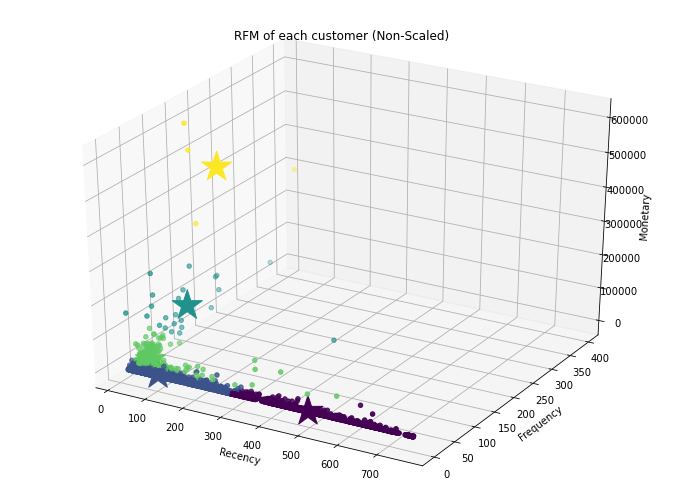

In [139]:
#Plot the values with the labels, and the cluster centers (the non-scaled values and centers)
plt.figure(figsize = (12, 9))
ax = plt.axes(projection="3d")
ax.scatter3D(rfm['recency'], rfm['frequency'], rfm['monetary'], c=rfm['label'], s=20)
ax.scatter3D(label_center['recency'], label_center['frequency'], label_center['monetary'], 
             c=[x for x in range(0,5)],
             marker="*", s=1000, depthshade=False)

plt.title("RFM of each customer (Non-Scaled)")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

## Comparing with RFM segments (from Part IV)

In [160]:
#Load the CSV exported with segments
retail_seg = pd.read_csv('./datasets/rfm.csv', index_col=[0])

In [161]:
retail_seg.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_combined,segment
12346,347,12,77556.46,2,5,5,255,Can't Lose
12347,24,8,5633.32,5,4,5,545,Champions
12348,97,5,2019.40,3,4,4,344,Loyal Customers
12349,40,4,4428.69,5,3,5,535,Potential Loyalists
12350,332,1,334.40,2,1,2,212,Hibernating


In [181]:
#Merge the two DataFrames together
combined_rfm = pd.concat([retail_seg, rfm['label']], axis=1, join='outer')

### Compare the Labels to the Segment
Here, we compare the labels to the segment and see how they differ and how they are similar. 

,counts
Hibernating,1323
At Risk,554
Can't Lose,37


Text(0.5, 1.0, 'Countplot of segments in cluster 0')

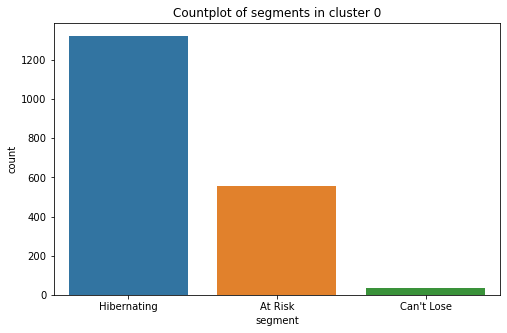

In [201]:
#Compare the labels to segment
#looking at label 0
label_0 = combined_rfm[combined_rfm['label'] == 0]
display(pd.DataFrame(label_0['segment'].value_counts()).rename(columns={'segment':'counts'}))
plt.figure(figsize=(8,5))
sns.countplot(label_0['segment'])
plt.title('Countplot of segments in cluster 0')

,counts
Loyal Customers,1031
Potential Loyalists,712
Champions,568
About to Sleep,388
Need Attention,269
Hibernating,199
At Risk,196
Promising,110
New Customers,56
Can't Lose,24


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

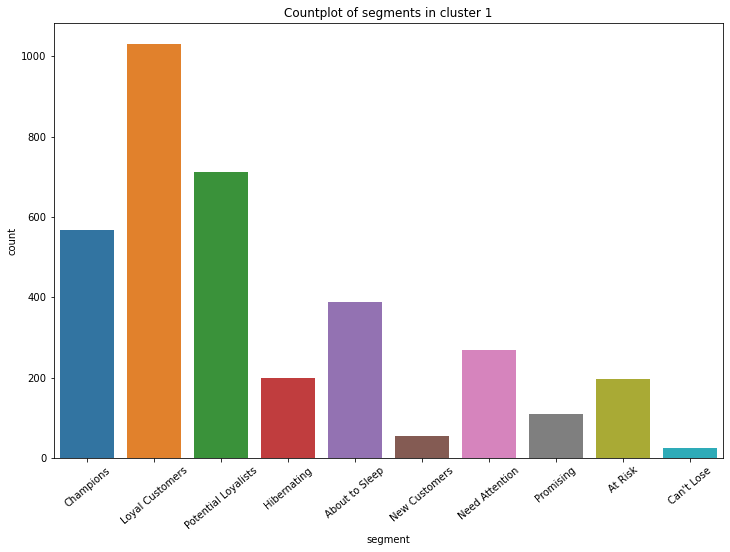

In [198]:
#Compare the labels to segment
#looking at label 1
label_1 = combined_rfm[combined_rfm['label'] == 1]
display(pd.DataFrame(label_1['segment'].value_counts()).rename(columns={'segment':'counts'}))
plt.figure(figsize=(12,8))
sns.countplot(label_1['segment'])
plt.title('Countplot of segments in cluster 1')
plt.xticks(rotation='40')

,counts
Champions,19
Loyal Customers,3
Potential Loyalists,1
Can't Lose,1


Text(0.5, 1.0, 'Countplot of segments in cluster 2')

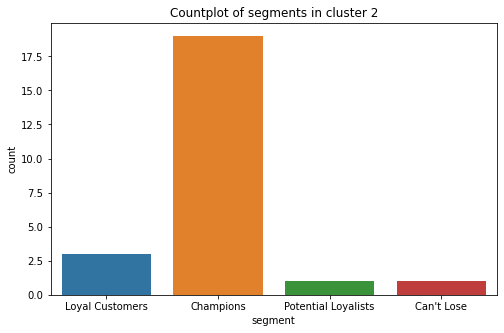

In [202]:
#Compare the labels to segment
#looking at label 2
label_2 = combined_rfm[combined_rfm['label'] == 2]
display(pd.DataFrame(label_2['segment'].value_counts()).rename(columns={'segment':'counts'}))
plt.figure(figsize=(8,5))
sns.countplot(label_2['segment'])
plt.title('Countplot of segments in cluster 2')

,counts
Champions,261
Loyal Customers,113
Can't Lose,9


Text(0.5, 1.0, 'Countplot of segments in cluster 3')

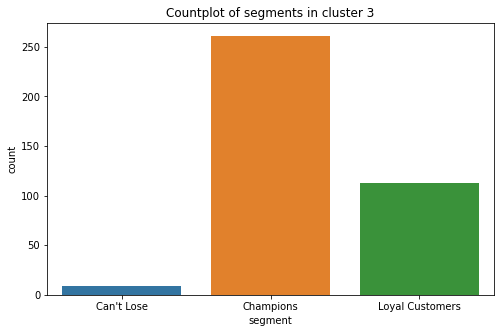

In [203]:
#Compare the labels to segment
#looking at label 3
label_3 = combined_rfm[combined_rfm['label'] == 3]
display(pd.DataFrame(label_3['segment'].value_counts()).rename(columns={'segment':'counts'}))
plt.figure(figsize=(8,5))
sns.countplot(label_3['segment'])
plt.title('Countplot of segments in cluster 3')

In [207]:
#Compare the labels to segment
#looking at label 4
label_4 = combined_rfm[combined_rfm['label'] == 4]
display(pd.DataFrame(label_4['segment'].value_counts()).rename(columns={'segment':'counts'}))

,counts
Champions,4


From the plots above, we notice that there are many overlaps between the RFM srgments and the segments determined by our model.